In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

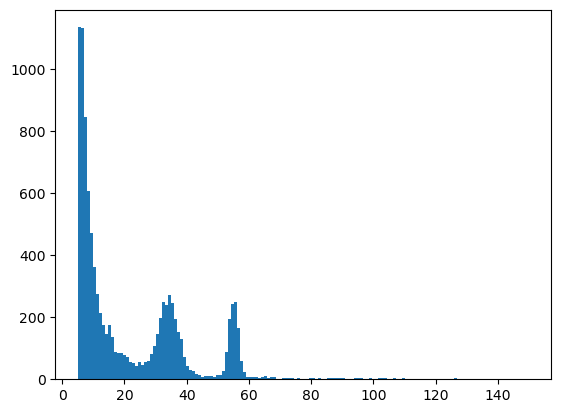

In [2]:
with h5py.File('mass_data_PLPTP.h5', 'r') as inp:
    mobs = np.array(inp['mobs'])
inp.close()

_ = plt.hist(mobs, bins=150)

# Result for Full Model with Errorbar
$$
P(\vec{\lambda}|m_{obs}) \propto \pi(\vec{\lambda}) \prod_{obs} (f_1\mathcal{N}(m_{obs}|\mu_1, \sqrt{\sigma^2+\sigma_1^2}) + f_2\mathcal{N}(m_{obs}|\mu_2, \sqrt{\sigma^2+\sigma_2^2}) + (1-f_1-f_2)\int_{m_{min}}^{m_{max}} dm \mathcal{N}(m_{obs}|m, \sigma) \text{PowerLaw}(m|\alpha))
$$
Fixed $f_1, \alpha, f_2$.

In [3]:
with h5py.File("samples_full_model_with_errorbar.h5",'r') as hf:
    #f1 = np.array(hf['f1'])
    mu1 = np.array(hf['mu1'])
    sigma1 = np.array(hf['sigma1'])
    #f2 = np.array(hf['f2'])
    mu2 = np.array(hf['mu2'])
    sigma2 = np.array(hf['sigma2'])
hf.close()

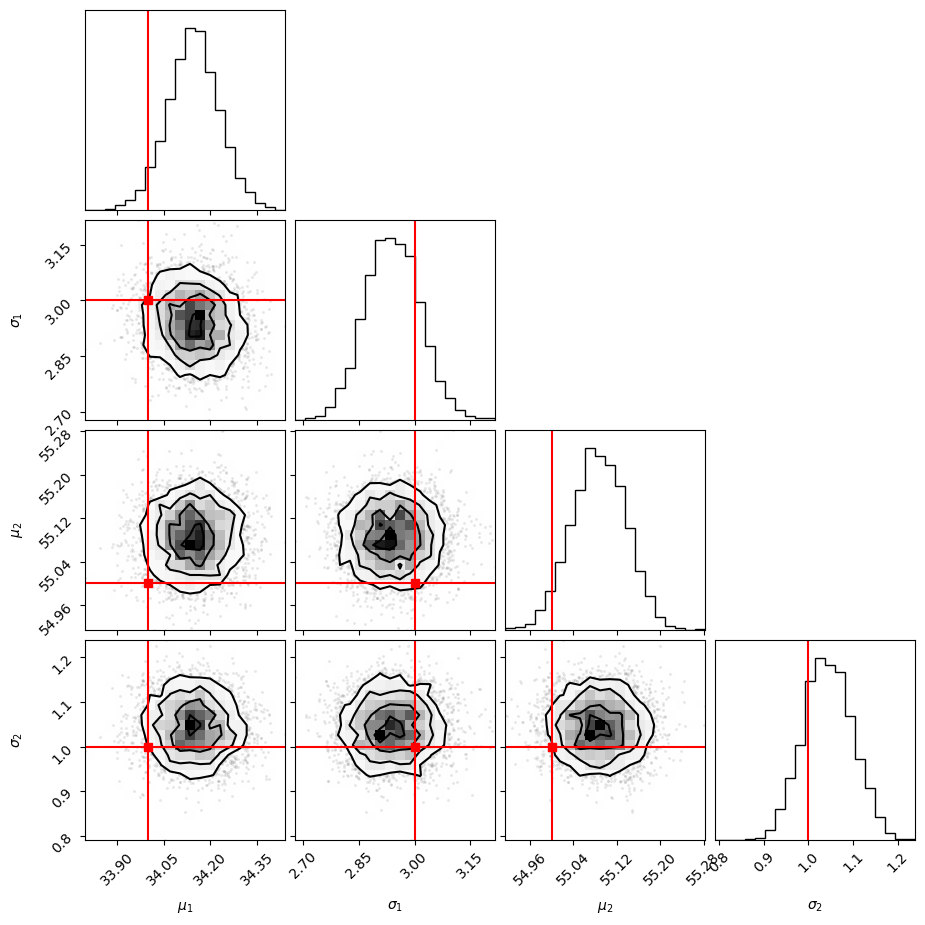

In [4]:
import corner
figure = corner.corner(np.array([mu1,sigma1,mu2,sigma2]).T,
                       labels=[r'$\mu_1$',r'$\sigma_1$',r'$\mu_2$', r'$\sigma_2$'])
true = np.array([34.0,3.0,55.0,1.0])
# Extract the axes
axes = np.array(figure.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="r")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="r")
        ax.axhline(true[yi], color="r")
        ax.plot(true[xi], true[yi], "sr")

# Result for Modelling the Higher Mass Peak with Errorbar
$$
P(\vec{\lambda}|m_{obs}) \propto \pi(\vec{\lambda}) \prod_{obs} (f_2\mathcal{N}(m_{obs}|\mu_2, \sqrt{\sigma^2+\sigma_2^2}) + (1-f_1-f_2)\int_{m_{min}}^{m_{max}} dm \mathcal{N}(m_{obs}|m, \sigma) \text{PowerLaw}(m|\alpha))
$$
Fixed $f_1, \alpha, f_2$.

In [5]:
with h5py.File("samples_higher_mass_with_errorbar.h5",'r') as hf:
    #f1 = np.array(hf['f1'])
    #f2 = np.array(hf['f2'])
    mu2 = np.array(hf['mu2'])
    sigma2 = np.array(hf['sigma2'])
hf.close()

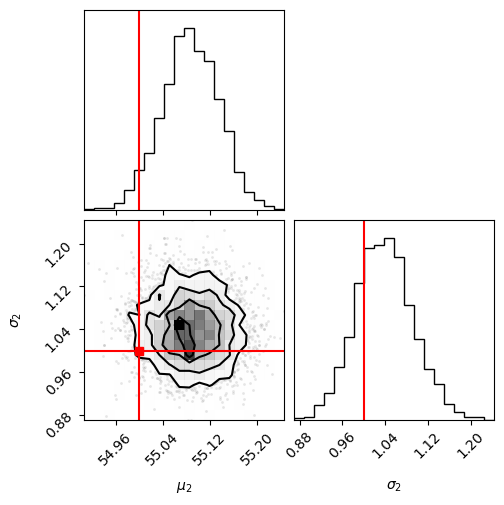

In [6]:
figure = corner.corner(np.array([mu2,sigma2]).T,
                       labels=[r'$\mu_2$', r'$\sigma_2$'])
true = np.array([55.0,1.0])
# Extract the axes
axes = np.array(figure.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="r")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="r")
        ax.axhline(true[yi], color="r")
        ax.plot(true[xi], true[yi], "sr")